In [1]:
import f_processing as dp
from pyspark.ml.regression import RandomForestRegressor

In [2]:
df1991, df2001 = dp.load_data()

In [3]:
df1991, df2001 = dp.preprocessing(df1991,df2001)

In [4]:
pdf_91 = dp.preprocess_data(df1991,['UniqueCarrier','Origin','Dest'],['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','ActualElapsedTime','CRSElapsedTime','DepDelay','Distance','Cancelled','Diverted'])

In [5]:
pdf_91.limit(10).show()

+-------------+------+----+-----+----------+---------+-------+----------+-------+----------+---------+-----------------+--------------+--------+--------+---------+--------+--------------------+------+
|UniqueCarrier|Origin|Dest|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|FlightNum|ActualElapsedTime|CRSElapsedTime|DepDelay|Distance|Cancelled|Diverted|            features|target|
+-------------+------+----+-----+----------+---------+-------+----------+-------+----------+---------+-----------------+--------------+--------+--------+---------+--------+--------------------+------+
|           US|   TPA| SYR|    1|         1|        2| 1709.0|      1705| 1944.0|      1944|      112|            155.0|           159|     4.0|  1104.0|        0|       0|(490,[0,42,302,47...|     0|
|           US|   TPA| SYR|    1|         2|        3| 1704.0|      1705| 1946.0|      1944|      112|            162.0|           159|    -1.0|  1104.0|        0|       0|(490,[0,42,302,47...|   

In [6]:
pdf_01 = dp.preprocess_data(df2001,['UniqueCarrier','TailNum','Origin','Dest'],['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','ActualElapsedTime','CRSElapsedTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted'])

In [7]:
pdf_01.show(5)

+-------------+-------+------+----+-----+----------+---------+-------+----------+-------+----------+---------+-----------------+--------------+--------+--------+------+-------+---------+--------+--------------------+------+
|UniqueCarrier|TailNum|Origin|Dest|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|FlightNum|ActualElapsedTime|CRSElapsedTime|DepDelay|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|            features|target|
+-------------+-------+------+----+-----+----------+---------+-------+----------+-------+----------+---------+-----------------+--------------+--------+--------+------+-------+---------+--------+--------------------+------+
|           US| N700äæ|   BWI| CLT|    1|        17|        3| 1806.0|      1810| 1931.0|      1934|      375|             85.0|          84.0|    -4.0|     361|     5|     20|      0.0|     0.0|(5048,[4,1374,459...|     0|
|           US| N713äæ|   BWI| CLT|    1|        18|        4| 1805.0|      1810| 1938.0|      1934|    

In [9]:
rf = RandomForestRegressor(featuresCol="features", labelCol="target")
model = rf.fit(pdf_91)

feature_cols = [col for col in pdf_91.columns if col not in ('target', 'features')]

# Extract feature importances
importances = model.featureImportances

# Match feature importances with column names
feature_importance_dict = {feature_cols[i]: importances[i] for i in range(len(feature_cols))}

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

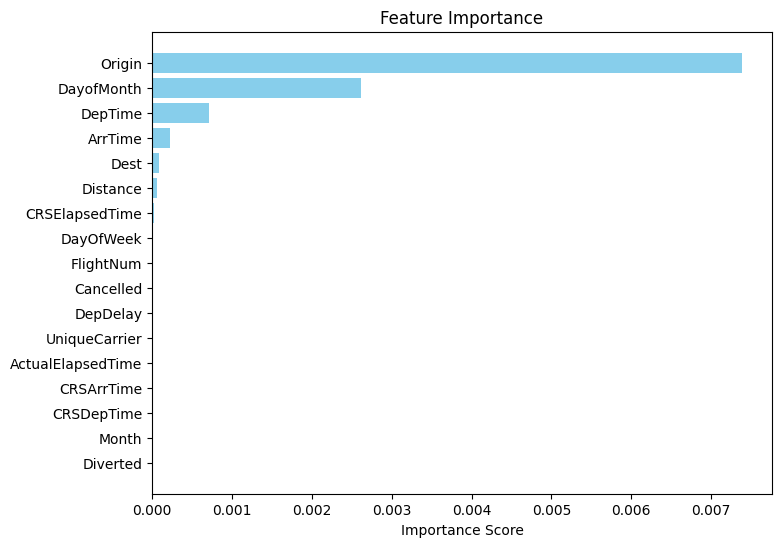

In [15]:
# Convert the dictionary to a DataFrame for visualization and tabular format
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sorting the DataFrame by importance scores for better visualization in bar plot
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance using Matplotlib
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

Error occurred: An error occurred while calling o2023.save.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	